# Analysing Bike Sharing Demand

Bike sharing systems are new generation of traditional bike rentals where whole process from membership,
rental, and return has become automatic. Through these systems, user can easily rent a bike from a particular
location and return at another location.
- Today, there exists a great interest in bike sharing systems due to their important role in traffic, environmental,and health issues.
- Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.
- Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems.
- This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Problem Statement 
Over the years, a steady rise in bike rentals have been observed and bike-sharing program manager need to keep up with growing demand to efficiently cover area and introduce new station if necessary.Use provided dataset to help program manager to opptimize its efficiency to join more people to green transportation solution. 


# Dataset

The dataset contains hourly and daily records of bike sharing counts. Bike-sharing rental process is highly correlated with the environmental and seasonal settings. So, weather information is also recorded in the dataset.

In [1]:
import pandas as pd    # panda dataframe 
import seaborn as sns  # ploting package
%matplotlib inline      
from scipy.stats import f_oneway   #ANOVA analysis 
from scipy.stats import shapiro  # Normality test
import matplotlib.pyplot as plt
from scipy import stats   # Correlation analysis
import statsmodels.api as sm   # Modeling 
import statsmodels.formula.api as smf  # Modeling
import numpy as np

To explore the data, we first need to read the dataset and check each features properties:

In [2]:
df=pd.read_csv('bike_sharing.csv')

In [3]:
df.head(10)

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.00,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.00,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.00,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.10,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.00,0.0,3,11
5,2016,10,1,5,14,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.00,0.0,3,15
6,2016,10,1,6,38,1,fall,17.78,64.0,100.0,12.0,0.0,30.1,0.00,0.0,3,42
7,2016,10,1,7,104,1,fall,17.78,64.0,100.0,13.0,0.0,30.1,0.00,0.0,3,115
8,2016,10,1,8,133,1,fall,17.78,64.0,100.0,14.0,0.0,30.1,0.00,0.2,3,146
9,2016,10,1,9,145,1,fall,17.78,63.5,98.0,9.0,0.0,30.1,0.05,0.0,3,174


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


## 1. Does seasonality affect the total number of rentals?

Text(0.5, 1.0, 'Number of Average Daily Rentals per Season')

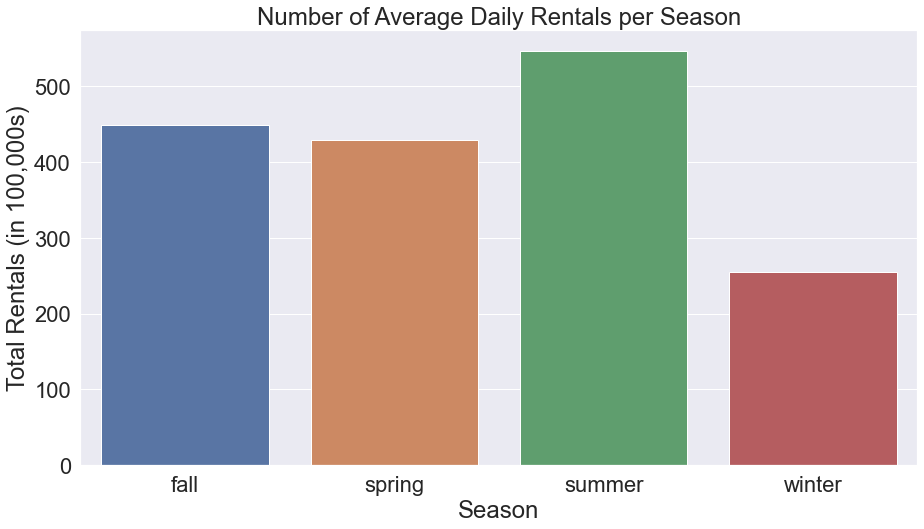

In [5]:
season = df[['season','rental']]
season_mean = season.groupby(by=['season']).mean().reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 2)
g = sns.barplot(data=season_mean, x='season', y='rental',ci= None)
g.set(ylabel = 'Total Rentals (in 100,000s)', xlabel = 'Season')
g.set_title("Number of Average Daily Rentals per Season")

Looking at total number of rentals across seasons, there is a clear relationship between seasons and average daily rentals. This is most visible between summer and winter, where the latter is significantly lower.

To better understand this, a distribution of rides per day would be useful

<AxesSubplot:xlabel='season', ylabel='rental'>

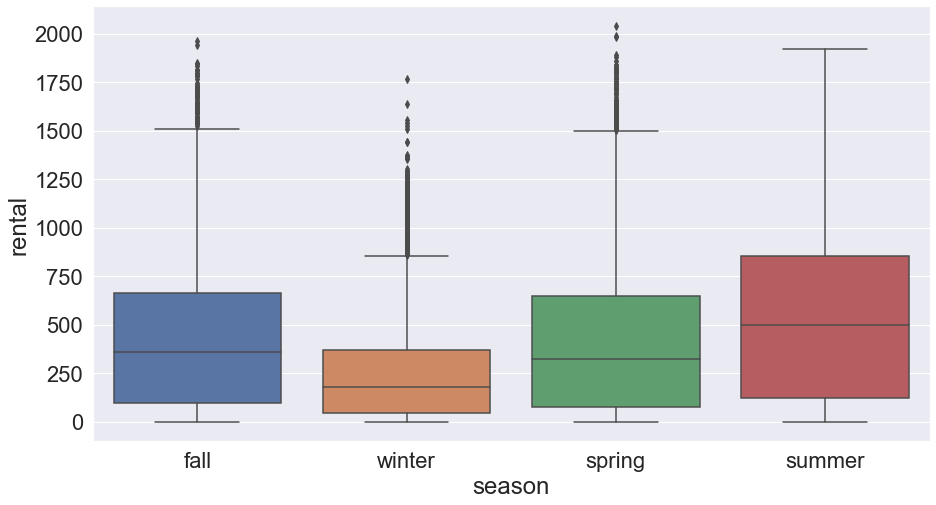

In [6]:
sns.boxplot(data=season, x='season', y='rental')

Despite having a roughly similar range (because of outliers), it is clear that, distribution of number of rides per day is lower in Winter than that of Summer. Fall and Spring are roughly equal.

To statistically prove this relationship, an ANOVA test would prove useful

 ## 2. Is there significant relationship between seasonality effect and the total number of hourly bike rentals at level of 95% confidence?

In [7]:
statistics,p_value = f_oneway(df.rental[df.season == 'fall'], df.rental[df.season == 'winter'], df.rental[df.season == 'spring'], df.rental[df.season == 'summer'])

print("\n \n Statistics = %.3f , p_value=%.3f" %(statistics,p_value))
if (p_value<.05):
    print('Analysis of the effect of seasonality demonstrates statistical significance, with a p-value of %.3f'%p_value )
else:
    print('Analysis of the effect of seasonality does not demonstrate statistical significance, with a p-value of %.3f'%p_value)


 
 Statistics = 423.838 , p_value=0.000
Analysis of the effect of seasonality demonstrates statistical significance, with a p-value of 0.000


## 3. Does the total number of bike rentals follows Normal distribution for different season at 95% confidence level?

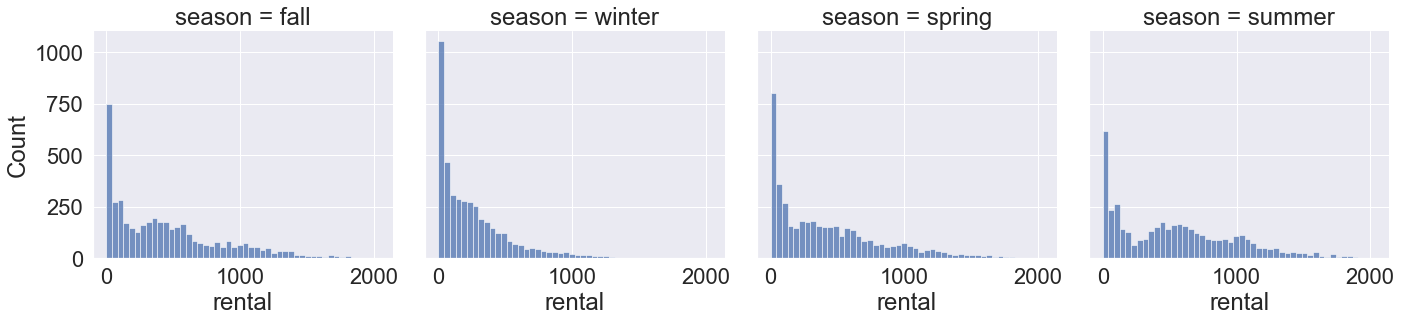

In [8]:
sns.displot(data=df, x="rental", col="season")

Upon observation, bike rentals do not follow normal distribution depending on the season. This however, can be quantifiably determined using the Shapio-Wilk test

In [9]:
for season in ['fall','winter','spring','summer']:
    statistic,p_value=shapiro(df.rental[df.season == season])
    print(season + ': Statistics = %.3f, P-value=%.3f' %(statistic,p_value))
    if (p_value<.05):
        print(season + ': Test demonstrates that daily rentals do not follows normal distribution, with a p-value of {}'.format(p_value))
    else:
        print(season + ': Test demonstrates that daily rentals do not follows normal distribution, with a p-value of {}'.format(p_value ))

fall: Statistics = 0.895, P-value=0.000
fall: Test demonstrates that daily rentals do not follows normal distribution, with a p-value of 0.0
winter: Statistics = 0.834, P-value=0.000
winter: Test demonstrates that daily rentals do not follows normal distribution, with a p-value of 0.0
spring: Statistics = 0.884, P-value=0.000
spring: Test demonstrates that daily rentals do not follows normal distribution, with a p-value of 0.0
summer: Statistics = 0.933, P-value=0.000
summer: Test demonstrates that daily rentals do not follows normal distribution, with a p-value of 1.3165479332024521e-40


After running the Shapiro-Wilk test on the distribution of rentals in each given season, it is clear that none of them follow the Normal Distribution

## 4. How do temperature values change over the seasons?


<AxesSubplot:xlabel='season', ylabel='temperature'>

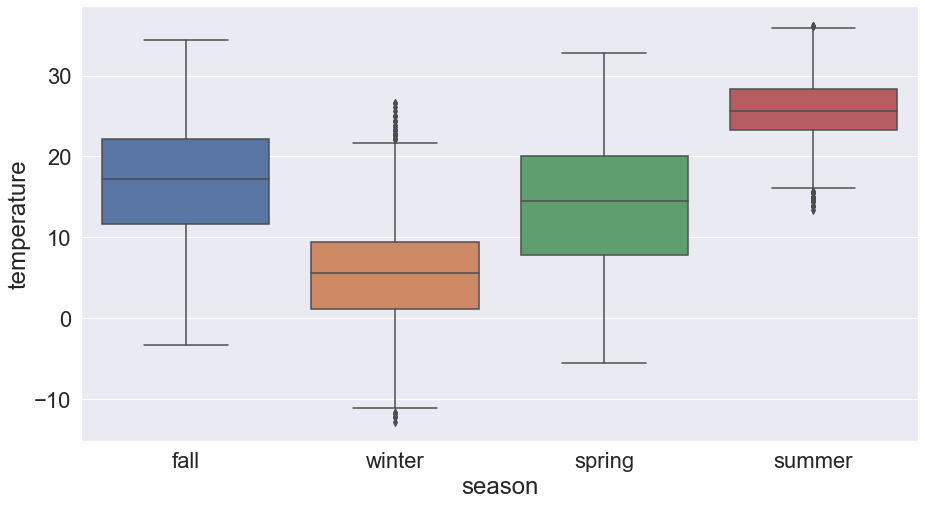

In [10]:
temperature = df[['season','temperature']]
sns.boxplot(data=temperature, x='season', y='temperature')

In [11]:
for season in ['fall','winter','spring','summer']:
    season_avg_temp = df[df['season']==season].temperature.mean()
    print(season + ' avg temperature: %.2f'%season_avg_temp)

fall avg temperature: 16.94
winter avg temperature: 5.22
spring avg temperature: 14.06
summer avg temperature: 25.89


After comparing the means and medians, it is clear that there is a disparity of temperatures between the seasons, potentially explaining the disparity in rental numbers between seasons. As expected, Summer has a higher temperature, and winter has a lower temperature with fall and spring being roughly equal. However, one observation that can be made is that winter has a lot of outliers on the upper end, some of which are even higher than the summer median

## 5. Is the correlation between temperature and the number of bike rentals significant at the level of 95%? 

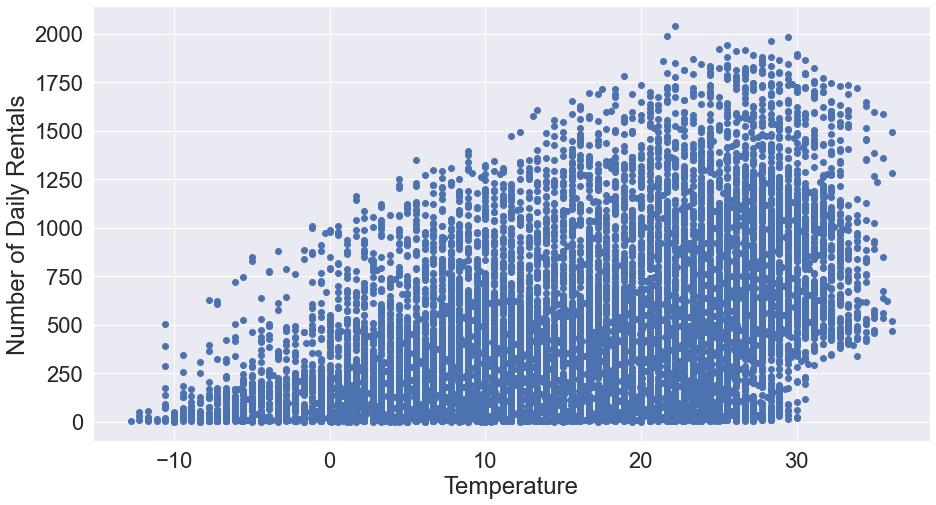

In [12]:
ax=plt.axes()
plt.scatter(df['temperature'],df['rental'])
plt.xlabel('Temperature')
plt.ylabel('Number of Daily Rentals')
plt.show()

In [23]:
statistic,p_value = stats.pearsonr(df['rental'], df['temperature'])
print("\n \n Statistics = %.3f , p_value=%.3f" %(statistics,p_value))

if (p_value<.05):
    print('Pearson Correlation Test demonstrates that Temperature and Daily Rentals are significantly linearly correlated, with a p-value of %.3f'%p_value )
else:
    print('Pearson Correlation Test demonstrates that  Temperature and Daily Rentals are linearly independent, with a p-value of %.3f'%p_value)


 
 Statistics = 33.236 , p_value=0.000
Pearson Correlation Test demonstrates that Temperature and Daily Rentals are significantly linearly correlated, with a p-value of 0.000


## 6. Is there a significant difference between the total bike rental on weekends and on working days?


<AxesSubplot:xlabel='weekend', ylabel='rental'>

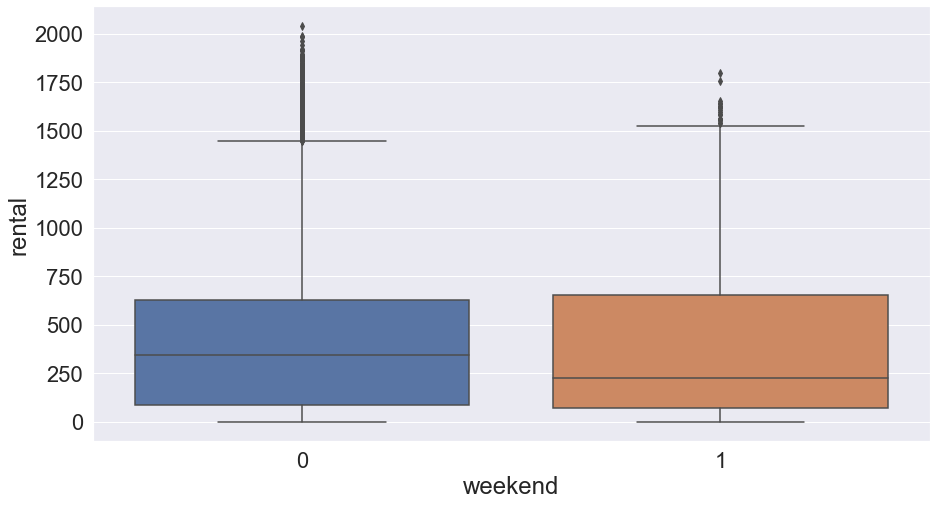

In [14]:
sns.boxplot(data=df, x='weekend', y='rental')

There does not seem to be sinificant difference between weekdays and weekends, with the exception of outliers on weekdays

In [15]:
df_weekend=df[df['weekend']==1]
df_weekday=df[df['weekend']==0]
statistics,p_value = f_oneway(df_weekend['rental'],df_weekday['rental'])

print("\n \n Statistics = %.3f , p_value=%.3f" %(statistics,p_value))
if (p_value<.05):
    print('Analysis of the variance model demonstrates that a day being weekend/weekday and daily rentals are significantly correlated, with a p-value of %.3f'%p_value )
else:
    print('Analysis of the variance model demonstrates that a day being weekend/weekday and daily rentals are independent, with a p-value of %.3f'%p_value)


 
 Statistics = 33.236 , p_value=0.000
Analysis of the variance model demonstrates that a day being weekend/weekday and daily rentals are significantly correlated, with a p-value of 0.000


## 7. To what extent hourly demand will be affected by temperature changes? What is the main driver of  number of bike rentals?

To best understand the role of certain factors, a poisson model must be applied to the factors. First, let's use temperature on its own

In [16]:
df['weekend'] = df['weekend'].astype('str')
formula = 'rental ~ temperature'
model = smf.glm(formula = formula, data=df, family=sm.families.Poisson())
result_GLM_1 = model.fit()
print(result_GLM_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rental   No. Observations:                17466
Model:                            GLM   Df Residuals:                    17464
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7282e+06
Date:                Mon, 26 Sep 2022   Deviance:                   5.3324e+06
Time:                        11:56:33   Pearson chi2:                 5.34e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2190      0.001   5809.286      

To better understand what factors drive rentals, we can apply another poisson model with almost all factors to see their relative effects

In [17]:
formula = 'rental ~ month + day + hour + member + weekend + season + temperature + pressure + precip + weather'
model = smf.glm(formula = formula, data=df, family=sm.families.Poisson())
result_GLM_2 = model.fit()
print(result_GLM_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rental   No. Observations:                17466
Model:                            GLM   Df Residuals:                    17453
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.4032e+05
Date:                Mon, 26 Sep 2022   Deviance:                   1.5566e+06
Time:                        11:56:33   Pearson chi2:                 1.36e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2361      0.058  

Although it would make sense to include all factors into the regression, the results don't particularly make sense since they are not necessarily independent of each other, which produces misleading data. This is particularly noticeable in seasons. We have previously seen how winter is a negative effect on average number of rides. But because this regression takes temperature, weather, and precipitation into account, the effect of winter is misleading.

In [18]:
formula = 'rental ~  season + weekend + member'
model = smf.glm(formula = formula, data=df, family=sm.families.Poisson())
result_GLM_3 = model.fit()
print(result_GLM_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rental   No. Observations:                17466
Model:                            GLM   Df Residuals:                    17460
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0181e+06
Date:                Mon, 26 Sep 2022   Deviance:                   1.9121e+06
Time:                        11:56:34   Pearson chi2:                 1.62e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.0335      0.001  

In [19]:
y_hat=result_GLM_1.predict()
df['y_hat_GLM_temp']=result_GLM_1.predict()
df['error_temp']=(df['rental']-df['y_hat_GLM_temp'])/df['rental']
MAPE=np.mean(np.abs(df['error_temp'][np.isfinite(df['error_temp'])]))
min(df['error_temp'])
print('Mean Absolute Error(MAPE) of Temp: %.3f'%MAPE)

y_hat=result_GLM_2.predict()
df['y_hat_GLM_all']=result_GLM_2.predict()
df['error_all']=(df['rental']-df['y_hat_GLM_all'])/df['rental']
MAPE=np.mean(np.abs(df['error_all'][np.isfinite(df['error_all'])]))
print('Mean Absolute Error(MAPE) of All: %.3f'%MAPE)

y_hat=result_GLM_3.predict()
df['y_hat_GLM_season']=result_GLM_3.predict()
df['error_season']=(df['rental']-df['y_hat_GLM_season'])/df['rental']
MAPE=np.mean(np.abs(df['error_season'][np.isfinite(df['error_season'])]))
print('Mean Absolute Error(MAPE) of Season + Weekend + Member: %.3f'%MAPE)

Mean Absolute Error(MAPE) of Temp: 7.024
Mean Absolute Error(MAPE) of All: 2.744
Mean Absolute Error(MAPE) of Season + Weekend + Member: 3.652


Given a higher MAPE, it is clear that temperature on its own is not a better factor to look at. Although the MAPE is low for all factors, the regression results are not particularly useful given that the factors are not independent.
The last regression's MAPE is close to to the MAPE of all factors, suggesting that despite only using three factors, it is a good inference tool. Especially since all three factors are close to independent!


After the MAPE analysis above, only three factors make up a large portion of how number of rentals is explained. Given that the standard error is incredibly close to zero, and the Z-score is in thousands for both the second and the third regression, _'member'_ is the key driver in number of rentals. _'seasonality'_ is also a good inference factor!

## 8. What is your suggestions and recommendations to enhance the effectiveness of bike rental business ?

Given the analysis upto this point, there are a number of factors with clear statistical significance on daily rental figures:
- Membership
- Temperature
- Season
- Weekend

The middle two are not entirely independent of each other and will therefore be considered as one factor. We can make suggestions based on this conclusion:
- Increase membership numbers! - offer discounts, welcome offers.
- Incentivise rentals in lower temperatures/colder days - lower fares.
- Incentivise rentals on weekdays - discounts in rush hours to create a bigger group of commuter users.

_For the second point, it is important to not incentivise health risks (biking on snow/ice), but for more milder cold days_